Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## Librerías

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Importar datos y primera visualización

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [5]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [6]:
df.isna().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

In [7]:
df.corr()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,1.000000,-0.622316,-0.182153,-0.272298,-0.495355,0.269412,-0.670282,-0.625041,-0.129477,-0.009559,...,0.022009,0.000314,-0.186106,0.011536,-0.635645,-0.386412,-0.002904,-0.590629,-0.007583,-0.416405
col1,-0.622316,1.000000,0.068536,0.209239,0.296823,-0.110139,0.366900,0.340983,0.169893,-0.001603,...,0.020401,-0.006932,0.232193,-0.012520,0.345596,0.244387,0.000861,0.327539,0.025411,0.358168
col2,-0.182153,0.068536,1.000000,0.055166,0.082996,-0.001662,0.110731,0.121478,0.022057,-0.018710,...,-0.048791,0.008791,-0.058001,0.008801,0.096208,0.049775,0.029816,0.078308,0.024384,-0.017318
col3,-0.272298,0.209239,0.055166,1.000000,0.360306,0.343399,0.355561,0.310508,-0.033510,0.004984,...,-0.092149,0.028841,0.301948,-0.016883,0.328398,0.227257,-0.008053,0.303467,0.002591,-0.132675
col4,-0.495355,0.296823,0.082996,0.360306,1.000000,-0.037666,0.445365,0.416649,0.078317,-0.023541,...,-0.055882,-0.005803,0.317054,-0.006503,0.471041,0.294568,0.033050,0.435385,0.001960,0.104875
col5,0.269412,-0.110139,-0.001662,0.343399,-0.037666,1.000000,-0.138517,-0.152531,-0.120050,0.001908,...,-0.046023,0.019647,-0.014961,-0.011347,-0.141748,-0.093256,0.003784,-0.153398,-0.005593,-0.271454
col6,-0.670282,0.366900,0.110731,0.355561,0.445365,-0.138517,1.000000,0.551453,0.129136,0.012978,...,-0.034044,0.003866,0.384610,-0.027252,0.590410,0.385324,0.006608,0.518238,-0.006657,0.198555
col7,-0.625041,0.340983,0.121478,0.310508,0.416649,-0.152531,0.551453,1.000000,0.121669,-0.001397,...,-0.058285,-0.015734,0.340895,-0.040220,0.516192,0.311134,0.029873,0.513997,-0.004092,0.174420
col8,-0.129477,0.169893,0.022057,-0.033510,0.078317,-0.120050,0.129136,0.121669,1.000000,0.013048,...,0.120507,-0.006042,0.168918,0.015245,0.109354,0.039575,0.008354,0.092649,0.012929,0.031497
col9,-0.009559,-0.001603,-0.018710,0.004984,-0.023541,0.001908,0.012978,-0.001397,0.013048,1.000000,...,0.030067,-0.002626,-0.021988,0.002967,-0.017018,0.006563,0.025123,0.013472,0.006963,0.003556


- Se observa que los datos no están balanceados, pero al haber ceros no se puede hacer logaritmo.

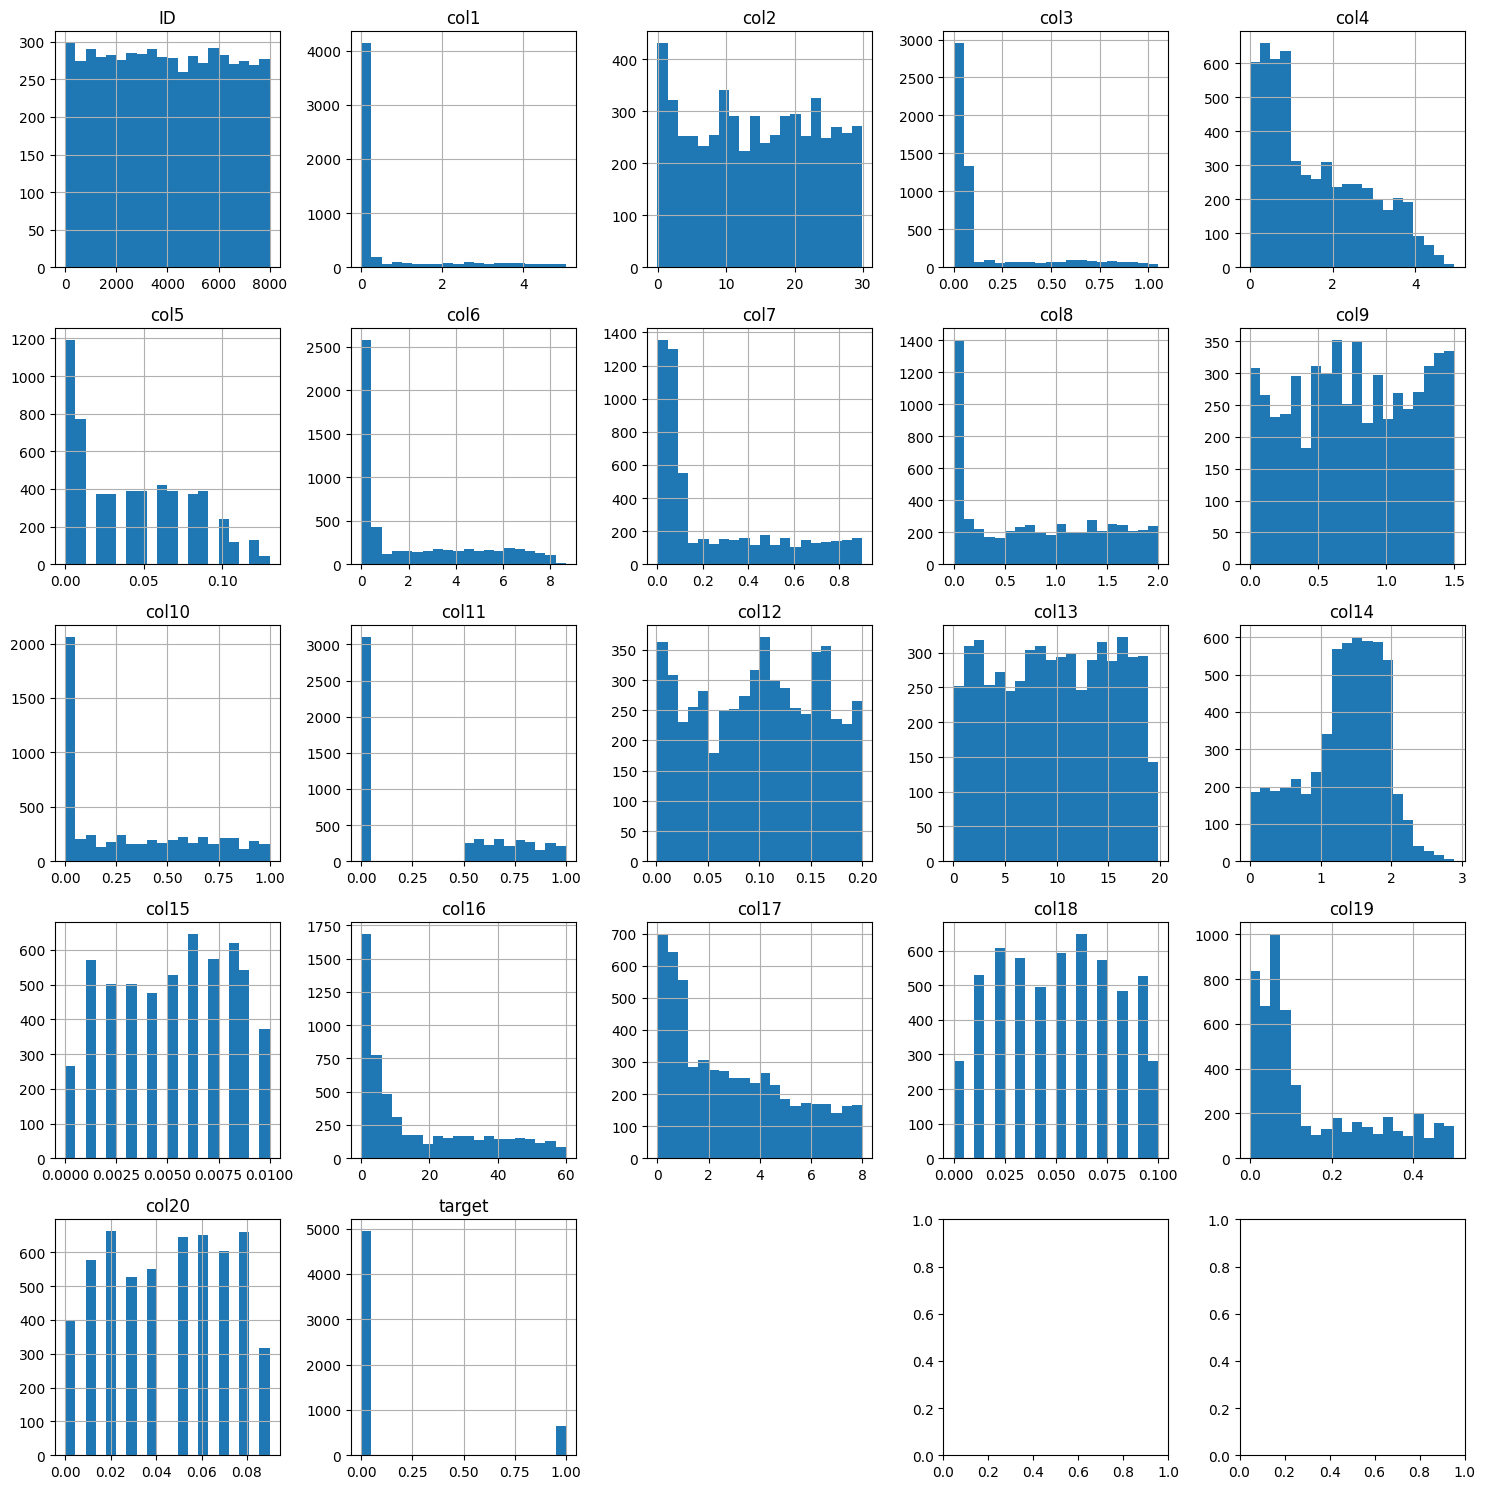

In [8]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.delaxes(axs.flatten()[-3])
df.hist(bins=20, ax=axs.flatten()[:-3])
plt.tight_layout()
plt.show()

- Se borra la columna ID y eliminan los valores negativos de col2, que darán problemas en el escalado

In [9]:
df.drop(columns='ID', inplace=True)

In [10]:
df[df['col2'] < 0]

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
402,2.59,-0.01,1.01,3.57,0.11,1.34,0.26,1.80,0.72,0.57,...,0.088,10.09,1.59,0.009,36.75,7.70,0.03,0.34,0.02,0
1013,0.19,-0.03,0.09,3.94,0.05,6.26,0.37,0.02,0.61,0.73,...,0.001,12.94,2.09,0.008,6.88,3.83,0.06,0.33,0.07,0
1514,0.01,-0.08,0.20,4.53,0.09,3.17,0.30,0.08,1.31,0.78,...,0.001,16.00,1.61,0.003,11.26,2.89,0.05,0.40,0.09,0
2590,0.10,-0.07,0.62,1.59,0.11,0.26,0.85,0.01,0.34,0.53,...,0.001,5.02,1.34,0.007,6.89,6.53,0.07,0.27,0.05,0
4425,2.82,-0.01,0.47,1.55,0.11,5.79,0.54,1.95,0.56,0.00,...,0.006,16.73,2.04,0.009,29.20,4.31,0.01,0.06,0.01,1
5229,1.92,-0.03,0.66,3.96,0.08,6.19,0.37,1.11,0.61,0.00,...,0.178,12.43,2.05,0.008,6.65,3.83,0.06,0.33,0.07,0


In [11]:
df = df[df['col2'] >= 0]

## División de datos

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=23 )

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4472, 20)
(1119, 20)
(4472,)
(1119,)


## Escalado y dummies

In [14]:
esc = MinMaxScaler()
X_train_mm = esc.fit_transform(X_train)
X_test_mm = esc.transform(X_test)

Se observa que se trata de un problema de clasificación, por lo que se prueban varios modelos.

In [15]:
modelos = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
    
}

# Define las métricas a usar
metricas = ['accuracy', 'precision']

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train_mm, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame

resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-p

,0
Linear Regression_accuracy,NaN
Linear Regression_precision,NaN
Decision Tree_accuracy,0.941866
Decision Tree_precision,0.753684
RandomForestClassifier_accuracy,0.953043
RandomForestClassifier_precision,0.919624
SVM_accuracy,0.931576
SVM_precision,0.862822
XGBoost_accuracy,0.964224
XGBoost_precision,0.901437


- XGBClassifier arroja el mejor resultado, por lo que se continúa con este

In [16]:
xgbc = XGBClassifier(verbose=False)
xgbc.fit(X_train_mm, y_train)

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:17:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
ypred = xgbc.predict(X_test_mm)
ypred

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1016
           1       0.92      0.82      0.87       103

    accuracy                           0.98      1119
   macro avg       0.95      0.90      0.93      1119
weighted avg       0.98      0.98      0.98      1119



In [56]:
# param_grid = {
#     'n_estimators': [4],
#     'learning_rate': [0.1],
#     'max_depth': [3],
# }
# xgbc = XGBClassifier()

# grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, scoring='accuracy')

# grid_search.fit(X_train_mm, y_train)

# best_parameters = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [58]:
# print(f"Best score: {grid_search.best_score_}")
# print(f"Best parameters: {best_parameters}")

Best score: 0.8801432007406107
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 4}


In [19]:
df1 = pd.read_csv('data/test.csv')

In [21]:
df1.drop(columns='ID', inplace=True)

In [22]:
df1 = df1[df1['col2'] >= 0]

In [23]:
esc = MinMaxScaler()
df1_mm = esc.fit_transform(df1)

In [24]:
ypred = xgbc.predict(df1)
ypred

array([0, 0, 0, ..., 0, 0, 0])